In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
Nx          = 400    # resolution x-dir
Ny          = 100    # resolution y-dir
rho0        = 100    # average density
tau         = 0.6    # collision timescale
Nt          = 25   # number of timesteps

# Lattice speeds / weights
NL = 9
idxs = np.arange(NL)
cxs = np.array([0, 0, 1, 1, 1, 0,-1,-1,-1])
cys = np.array([0, 1, 1, 0,-1,-1,-1, 0, 1])
weights = np.array([4/9,1/9,1/36,1/9,1/36,1/9,1/36,1/9,1/36]) # sums to 1
X, Y = np.meshgrid(range(Nx), range(Ny))


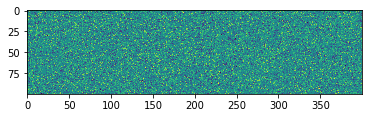

In [22]:
# Initial Conditions - flow to the right with some perturbations
F = np.ones((Ny,Nx,NL)) + 0.01*np.random.randn(Ny,Nx,NL)
F[:,:,3] += 2 * (1+0.2*np.cos(2*np.pi*X/Nx*4))
rho = np.sum(F,2)
for i in idxs:
  F[:,:,i] *= rho0 / rho

# Cylinder boundary
cylinder = (X - Nx/4)**2 + (Y - Ny/2)**2 < (Ny/4)**2

plt.imshow(F.sum(2))

99999995553
4664 70.3581895593691 105.25536734229344 99.99999999995553
4665 70.71572514097315 105.34144681001891 99.99999999995553
4666 70.33906215625775 105.45537352745127 99.99999999995552
4667 70.71068328215252 105.52484003407274 99.9999999999555
4668 70.32168551082569 105.62162873066079 99.9999999999555
4669 70.7057044638443 105.67467432475408 99.9999999999555
4670 70.30602083950394 105.75100483837802 99.99999999995548
4671 70.70104440415842 105.79101359220493 99.99999999995548
4672 70.29202095025255 105.846493364445 99.99999999995546
4673 70.696931189166 105.87394682574447 99.99999999995546
4674 70.2796354110038 105.91570716134656 99.99999999995545
4675 70.69356420837583 105.92991412073951 99.99999999995545
4676 70.26881599366067 105.96474420241688 99.99999999995543
4677 70.69111599590173 105.972003099088 99.99999999995543
4678 70.2595218644413 106.00598942314284 99.99999999995542
4679 70.68973569617016 106.01264704167589 99.9999999999554
4680 70.2517240035586 106.05274653415653 9

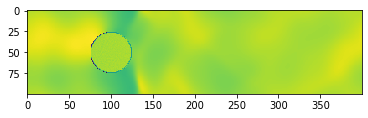

In [31]:
Nt = 120

# Simulation Main Loop
for it in range(Nt):
    
    # Drift
    for i, cx, cy in zip(idxs, cxs, cys):
        F[:,:,i] = np.roll(F[:,:,i], cx, axis=1)
        F[:,:,i] = np.roll(F[:,:,i], cy, axis=0)
    
    # Set reflective boundaries
    bndryF = F[cylinder,:]
    bndryF = bndryF[:,[0,5,6,7,8,1,2,3,4]]
    
    # Calculate fluid variables
    rho = np.sum(F,2)
    ux  = np.sum(F*cxs,2) / rho
    uy  = np.sum(F*cys,2) / rho
    
    # Apply Collision
    Feq = np.zeros(F.shape)
    for i, cx, cy, w in zip(idxs, cxs, cys, weights):
        Feq[:,:,i] = rho*w* (1 + 3*(cx*ux+cy*uy) + 9*(cx*ux+cy*uy)**2/2 - 3*(ux**2+uy**2)/2)
    
    F += -(1.0/tau) * (F - Feq)
    
    # Apply boundary 
    F[cylinder,:] = bndryF
    # print(it, F.sum(), F.min(), F.max(), F.mean())
    print(it, F.sum(2).min(), F.sum(2).max(), F.sum(2).mean())
plt.imshow(F.sum(2))

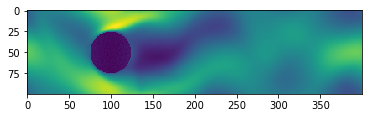

In [36]:
plt.imshow(F[:,:,3])

In [14]:
F[cylinder,:]#.shape


array([[ 8.84954068,  8.72902734,  8.84733509, ...,  2.41741265,
         9.89118211,  8.72105219],
       [ 8.87155508,  8.90676674,  8.77194096, ...,  2.48588934,
         8.75798056,  8.63318756],
       [ 8.72798473,  9.00723706,  8.89334845, ...,  2.35231154,
         8.68980102,  8.76868644],
       ...,
       [ 8.72958182, 10.12793122,  2.56271119, ...,  8.75204815,
         8.71299594,  2.50229411],
       [ 8.77193108, 10.21285324,  2.59816882, ...,  8.78649012,
         8.74602022,  2.51871728],
       [ 8.78189135, 10.24792607,  2.6058204 , ...,  8.70285353,
         8.95068989,  2.52933748]])

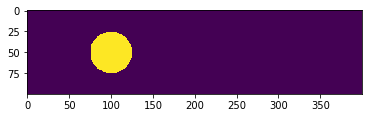

In [16]:
plt.imshow(cylinder)

In [27]:
[(v.max(),v.min()) for v in [ux,uy]]

[(0.37025839270947386, -0.08976837462211418),
 (0.14171080561332705, -0.14191478733198143)]